In [42]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
dfList = []
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
%matplotlib inline
originalData = pd.read_csv("tomslee_airbnb_new_york_1196_2017-05-06.csv")
originalData = originalData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
                          'price', 'longitude','latitude','property_type']]


originalData = originalData[originalData.overall_satisfaction.map(lambda x:not math.isnan(x))]
originalData = originalData[originalData.reviews.map(lambda x:x is not 0)]
originalData = originalData[originalData.price.map(lambda x: x<2000)]
originalData.reset_index(drop = True, inplace=True)
display(originalData.describe())
display(originalData.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Shared room,Manhattan,5,3,4.5,1.0,240.0,-73.956041,40.772774,Apartment
1,Shared room,Manhattan,2,4,5.0,1.0,110.0,-73.954550,40.771820,Apartment
2,Shared room,Manhattan,2,3,5.0,1.0,105.0,-73.943941,40.780694,Apartment
3,Shared room,Manhattan,3,7,4.5,1.0,114.0,-73.943762,40.786761,Apartment
4,Shared room,Brooklyn,2,1,0.0,1.0,99.0,-73.982937,40.694308,Apartment


In [43]:
print(originalData.columns)
display(originalData.describe())
display(originalData['borough'].value_counts())
display(originalData['room_type'].value_counts())
display(originalData['property_type'].value_counts())

Index(['room_type', 'borough', 'accommodates', 'reviews',
       'overall_satisfaction', 'bedrooms', 'price', 'longitude', 'latitude',
       'property_type'],
      dtype='object')


,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


Manhattan        14698
Brooklyn         12723
Queens            3033
Bronx              485
Staten Island      193
Name: borough, dtype: int64

Entire home/apt    15954
Private room       14348
Shared room          830
Name: room_type, dtype: int64

Apartment             26499
House                  2798
Loft                    677
Townhouse               454
Condominium             268
Other                   157
Bed & Breakfast         131
Guesthouse               32
Timeshare                23
Hostel                   19
Villa                    15
Dorm                     12
Bungalow                 12
Boutique hotel           10
Serviced apartment        5
Boat                      4
Guest suite               4
Cabin                     3
Castle                    2
Cave                      1
Hut                       1
Chalet                    1
Lighthouse                1
Earth House               1
Vacation home             1
In-law                    1
Name: property_type, dtype: int64

In [44]:
sampledData = originalData.sample(frac=0.1).reset_index(drop=True)
usefulData = sampledData.sample(frac=1).reset_index(drop=True)
broughChosen = ['Manhattan', 'Brooklyn']
data_p1 = usefulData[usefulData['borough'].map(lambda x: x in broughChosen)]

In [45]:
# usefulData = sampledData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
#                            'price', 'longitude']]
# usefulData = sampledData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price']]
display(usefulData.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,4,45,5.0,2.0,180.0,-73.995894,40.722343,Apartment
1,Private room,Manhattan,1,9,4.5,1.0,100.0,-73.974686,40.796562,Apartment
2,Entire home/apt,Queens,7,10,4.5,2.0,166.0,-73.895398,40.739760,House
3,Private room,Manhattan,2,78,5.0,1.0,60.0,-73.939886,40.827106,Apartment
4,Private room,Bronx,2,3,4.0,1.0,115.0,-73.913146,40.882488,House


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,4,45,5.0,2.0,180.0,-73.995894,40.722343,Apartment
1,Private room,Manhattan,1,9,4.5,1.0,100.0,-73.974686,40.796562,Apartment
2,Private room,Manhattan,2,78,5.0,1.0,60.0,-73.939886,40.827106,Apartment
3,Entire home/apt,Brooklyn,6,44,5.0,2.0,250.0,-73.957058,40.730760,Loft
4,Entire home/apt,Brooklyn,4,13,4.5,1.0,100.0,-73.974666,40.689481,Apartment


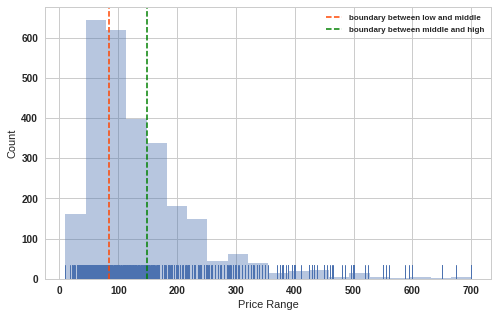

In [46]:
# view the distribution of price for the labeling later
tmp = data_p1[data_p1.price.map(lambda x: x<750)]
pricePlt = sns.distplot(tmp['price'].sort_values(), bins=20, kde=False, rug=True)
pricePlt.set_xlabel('Price Range')
pricePlt.set_ylabel('Count')
pricePlt.figure.set_size_inches(8,5)
plt.axvline(x = 85, linewidth=1.5, color = 'orangered',linestyle="--", label = 'boundary between low and middle')
plt.axvline(x = 149, linewidth=1.5, color = 'green',linestyle="--", label = 'boundary between middle and high')
plt.legend(loc = 'upper right',prop={'size':8})
data_p1.reset_index(drop = True, inplace=True)
display(data_p1.head())

In [47]:
lableLow = data_p1['price'].map(lambda x: x <85)
lableMid = data_p1['price'].map(lambda x: x<=149 and x >= 85)
lableHigh = data_p1['price'].map(lambda x: x >149)
print(lableLow.value_counts(),lableMid.value_counts(), lableHigh.value_counts())
p1_price = data_p1['price']
data_p1 = data_p1.drop(axis=1,labels=['price'])

False    1836
True      908
Name: price, dtype: int64 False    1804
True      940
Name: price, dtype: int64 False    1848
True      896
Name: price, dtype: int64


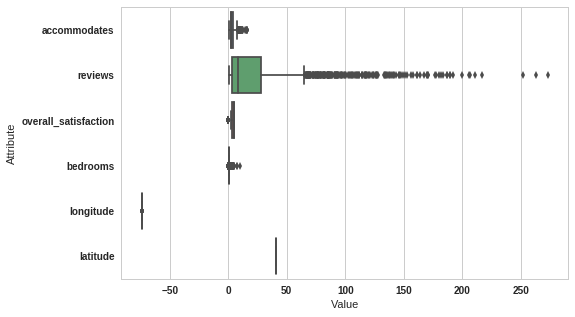

In [48]:
data_p1_coded = pd.get_dummies(data_p1)
sns.set_style("whitegrid")
plot = sns.boxplot(data=data_p1_coded.iloc[:,0:6], orient='h')
plot.set_yticklabels(data_p1_coded.columns);
plot.set_xlabel('Value')
plot.set_ylabel('Attribute')
plot.figure.set_size_inches(8,5)

In [49]:
data1 = np.array(data_p1_coded)
display(data_p1_coded.tail().iloc[:3,:9])
x = (data1-data1.mean(axis=0))/data1.std(axis=0)
tmp = pd.DataFrame(x)
display(tmp.head())

,accommodates,reviews,overall_satisfaction,bedrooms,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2739,2,14,4.5,1.0,-73.988709,40.731470,1,0,0
2740,2,12,5.0,1.0,-73.921992,40.699472,0,1,0
2741,2,26,4.5,0.0,-73.994887,40.733407,1,0,0


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.561418,0.708419,0.705530,1.130450,-1.274858,-0.117713,0.941228,-0.896703,-0.156988,-0.952998,...,-0.054074,-0.087818,-0.019094,-0.033083,-0.033083,-0.245516,-0.168777,-0.081259,-0.033083,-0.113666
1,-1.041077,-0.401202,0.459379,-0.242704,-0.431292,1.316696,-1.062442,1.115196,-0.156988,-0.952998,...,-0.054074,-0.087818,-0.019094,-0.033083,-0.033083,-0.245516,-0.168777,-0.081259,-0.033083,-0.113666
2,-0.506912,1.725571,0.705530,-0.242704,0.952907,1.907011,-1.062442,1.115196,-0.156988,-0.952998,...,-0.054074,-0.087818,-0.019094,-0.033083,-0.033083,-0.245516,-0.168777,-0.081259,-0.033083,-0.113666
3,1.629748,0.677596,0.705530,1.130450,0.269877,0.044959,0.941228,-0.896703,-0.156988,1.049320,...,-0.054074,-0.087818,-0.019094,-0.033083,-0.033083,-0.245516,5.924969,-0.081259,-0.033083,-0.113666
4,0.561418,-0.277911,0.459379,-0.242704,-0.430496,-0.752828,0.941228,-0.896703,-0.156988,1.049320,...,-0.054074,-0.087818,-0.019094,-0.033083,-0.033083,-0.245516,-0.168777,-0.081259,-0.033083,-0.113666


In [50]:
print(data_p1_coded.tail().iloc[:3,:9].to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &  accommodates &  reviews &  overall\_satisfaction &  bedrooms &  longitude &   latitude &  room\_type\_Entire home/apt &  room\_type\_Private room &  room\_type\_Shared room \\
\midrule
2739 &             2 &       14 &                   4.5 &       1.0 & -73.988709 &  40.731470 &                          1 &                       0 &                      0 \\
2740 &             2 &       12 &                   5.0 &       1.0 & -73.921992 &  40.699472 &                          0 &                       1 &                      0 \\
2741 &             2 &       26 &                   4.5 &       0.0 & -73.994887 &  40.733407 &                          1 &                       0 &                      0 \\
\bottomrule
\end{tabular}



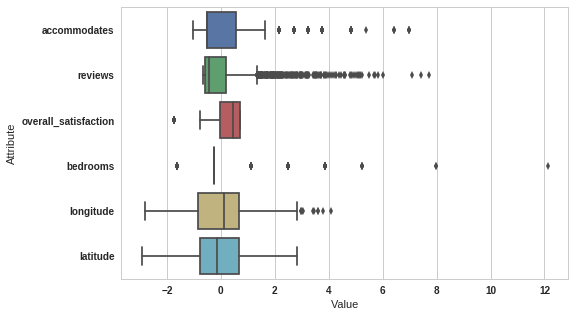

In [51]:
# plt.boxplot(x,vert=False);
plotNorm = sns.boxplot(data=x[:,0:6], orient='h')
plotNorm.set_yticklabels(data_p1_coded.columns);
# plotNorm.figure.set_size_inches(10,5)
plotNorm.set_xlabel('Value')
plotNorm.set_ylabel('Attribute')
plotNorm.figure.set_size_inches(8,5)

In [52]:
covMatrix = x.transpose().dot(x)/x.shape[0]

In [53]:
(eigenVals,eigneVectors)= np.linalg.eig(covMatrix)
idx = eigenVals.argsort()[::-1]   
eigenVals = eigenVals[idx]
eigneVectors = eigneVectors[:,idx]

In [54]:
totalEigenval = []
tmp = 0
eigenvalSum = sum(eigenVals)
for val in eigenVals:
    tmp += val
    totalEigenval.append(tmp/eigenvalSum)
print(totalEigenval)

[0.13902007195237226, 0.25795739886762403, 0.34019097460191983, 0.40046046379440969, 0.45679937081894056, 0.50834249407901111, 0.5555938586500182, 0.6019668194757527, 0.64786284831983265, 0.69344737043322613, 0.73895800898055708, 0.78421821174139927, 0.82921490333836667, 0.87199013034318196, 0.91425657102092295, 0.95335525460452009, 0.98237155598112547, 0.99324286060121636, 0.99999999999999967, 0.99999999999999989, 1.0, 1.0]


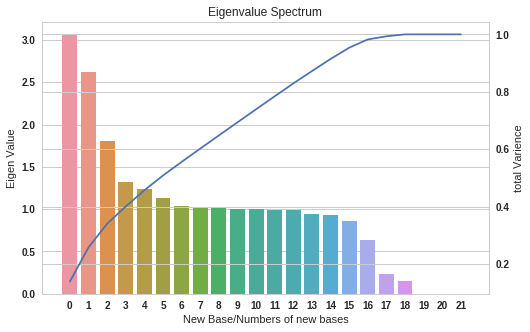

In [55]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals))),y=eigenVals, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('total Varience')

In [56]:
print(data_p1_coded.columns)
print(eigneVectors[:,0])
print(eigneVectors[:,1])
print(eigneVectors[:,2])

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse'],
      dtype='object')
[ 0.06719433  0.02140657  0.00469739  0.11963385  0.24386768 -0.44267907
 -0.06879835  0.07397425 -0.01587467  0.52987073 -0.52987073 -0.268786
  0.02307169 -0.00105805  0.02520016  0.02714728 -0.01344671  0.24795387
  0.11182904  0.03256274 -0.01574083  0.06037904]
[-0.50489513 -0.08099895 -0.11592801 -0.35319289  0.11153384  0.02887684
 -0.53184821  0.52104267  0.04214147  0.04551562 -0.04551562  0.10749835
  0.008

In [57]:
# x is actually X^T
X_tilde1 = x.dot(eigneVectors[:,:3])
X_tilde1 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde1['price'] = p1_price

In [58]:
def priceLabel(price):
    if price < 85:
        return 'low'
    elif price >= 149:
        return 'high'
    else:
        return 'middle'
    
X_tilde1['label'] = X_tilde1['price'].map(priceLabel)
color = {'high':'mediumorchid','middle':'darkorange', 'low':'deepskyblue'}

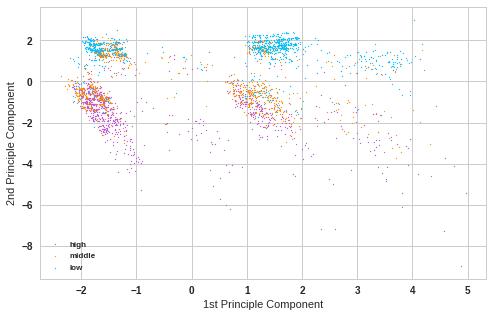

In [73]:

labels = ['high', 'middle', 'low']
for label in labels:
    dfList.append(X_tilde1[X_tilde1.label.map(lambda x: x == label)])
for (df, label) in zip(dfList, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 1, c=color[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-2d.png', format='png', dpi=200)


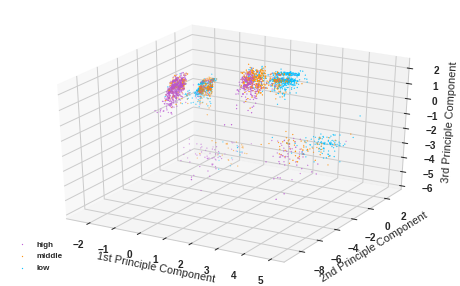

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList, labels):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 1, c=color[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-3d.png', format='png', dpi=200)
plt.show()